# Übung 2: Farben

### Detektion mit Farben

In unserem SkinApp Projekt befassen wir uns mit der Erkennung von Hautkrankheiten, zum Beispiel auf Händen. Als erstes muss dabei die Handfläche vom Hintergrund getrennt werden. Damit dies einfacher geht, haben wir eine Photobox entwickelt, die die Hände vor grünem Hintergrund aufnimmt. Sie sollen nun untersuchen, ob es damit tatsächlich einfacher ist die Handflächen oder Handrückseiten zu finden.





In [2]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 200

### Aufgabe 1: Hand Segmentierung

Als erstes sollen sie versuchen die Handflächen mittels der Farbe der Haut zu detektieren. Dazu ist es möglicherweise hilfreich das Bild in einer anderen Farbraum zu transferieren. Für Hautsegemntierung könnte sich zum Beispiel der YCrCb oder der HSV Farbraum einigen. Stellen Sie das Bild in diesen Farbräumen dar und suchen Sie dann entsprechende Schwellwerte um eine binäre Maske der Hand zu erstellen. Gerne können Sie auch auf dem Internet nach weiteren Möglichkeiten suchen.

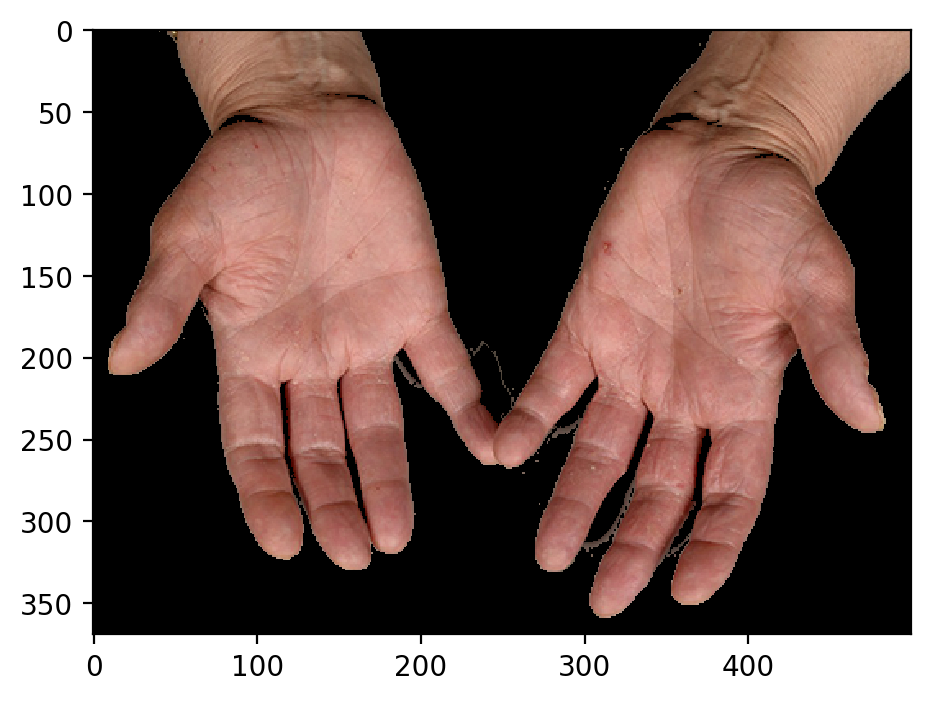

In [3]:
image_grey_back = cv2.imread('images/hand_grey_small.png')
image_grey_back = cv2.cvtColor(image_grey_back, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_grey_back, cv2.COLOR_RGB2HSV)
plt.imshow(image_grey_back)
plt.imshow(image_hsv)
lower = np.array([0, 60, 75])
upper = np.array([255, 255, 255])
hand_mask = cv2.inRange(image_hsv, lower, upper)
plt.imshow(hand_mask, cmap='gray')
hands_hsv = cv2.bitwise_and(image_hsv, image_hsv, mask=hand_mask)
hands = cv2.cvtColor(hands_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(hands)

### Aufgabe 2: Hintergrund Segmentierung

Im folgenden wird ein Bild mit grünem Hintergrund geladen. Führen Sie darauf die gleiche Segmentierung wie beim oberen Bild durch und stellen Sie diese dar.

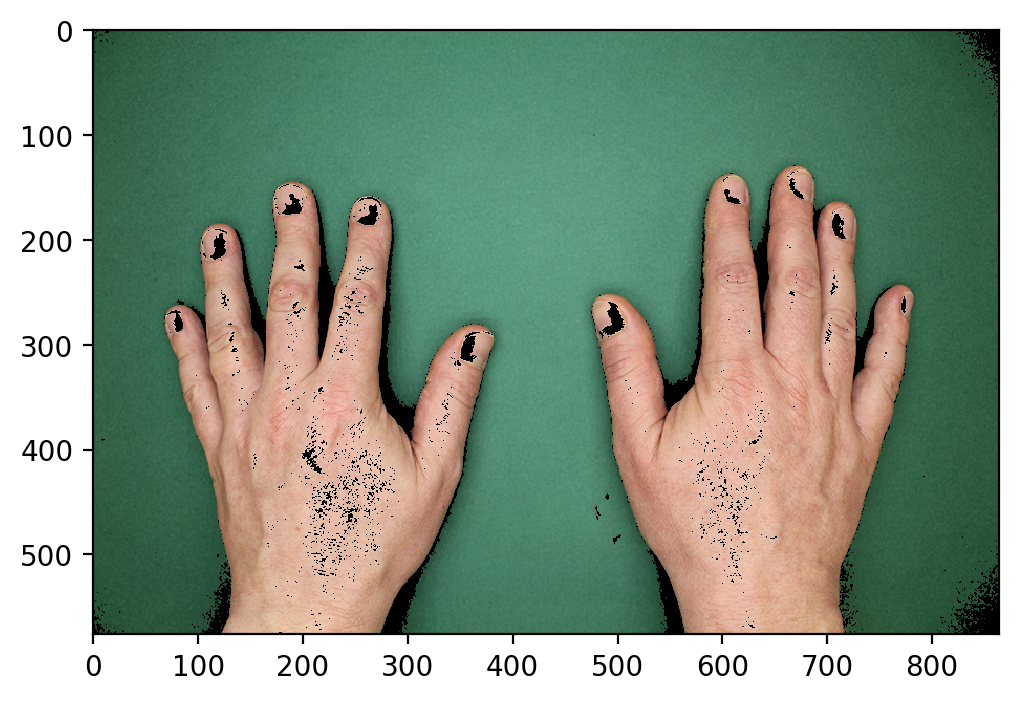

In [156]:
image_green_back = cv2.imread('images/hand_green_small.png')
image_green_back = cv2.cvtColor(image_green_back, cv2.COLOR_BGR2HSV) # need HSV for the range selection!
lower = np.array([0, 60, 75])
upper = np.array([255, 255, 255])
hand_mask = cv2.inRange(image_green_back, lower, upper)
plt.imshow(hand_mask, cmap='gray')
image_green_back = cv2.bitwise_and(image_green_back, image_green_back, mask=hand_mask)
hands = cv2.cvtColor(image_green_back, cv2.COLOR_HSV2RGB)
plt.imshow(hands)

Segmentieren Sie nun an Stelle der Haut den grünen Hintergrund. Können Sie damit eine bessere Unterscheidung zwischen Hand und Hintergrund erhalten?

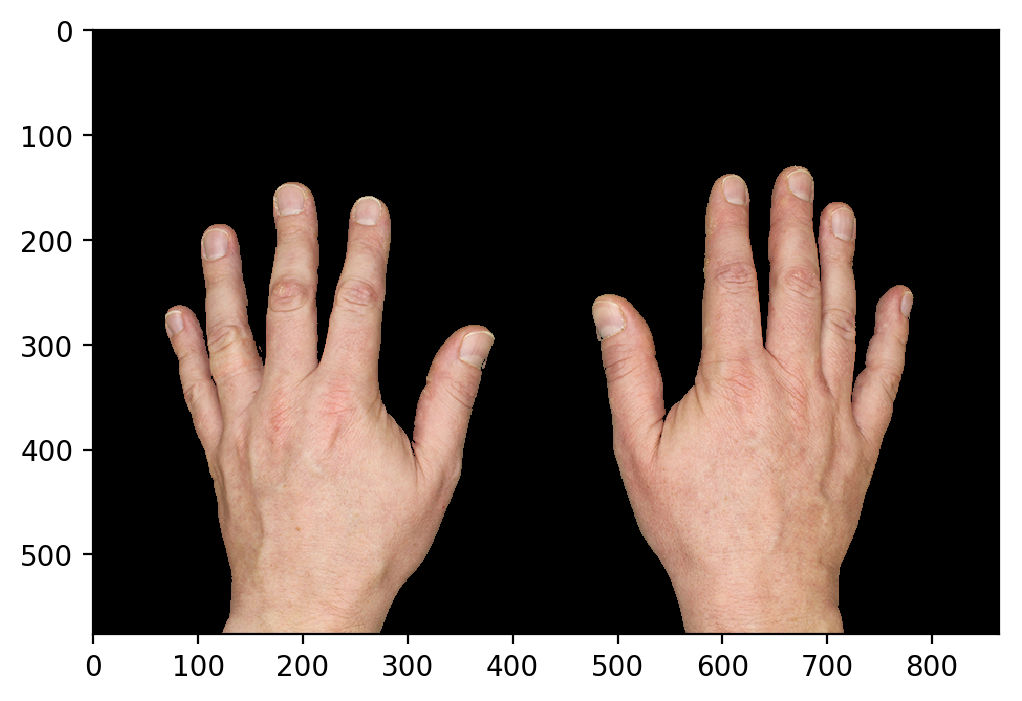

In [87]:
image_green_back = cv2.imread('images/hand_green_small.png')
image_green_back = cv2.cvtColor(image_green_back, cv2.COLOR_BGR2RGB)
plt.imshow(image_green_back)
lower = np.array([120, 0, 0])
upper = np.array([255, 255, 255])
bg_mask = cv2.inRange(image_green_back, lower, upper)
plt.imshow(bg_mask, cmap='gray')
hands = cv2.bitwise_and(image_green_back, image_green_back, mask=bg_mask)
plt.imshow(hands)

### Aufgabe 3: Bluescreen

Blue Screening wird in der Filmindustrie verwendet um Regionen in einem Bild, zum Beispiel ein blauer Hintergrund mit einem anderen Bild zu ersetzen.

Entwickeln sie ein Program, das 2 Bilder mit Hilfe dieser Technik aufeinander legt. Gehen Sie dazu wie folgt vor:

Berechnen sie für jeden Pixel die Transparenz α aufgrund des Farbwertes von I1 

Berechnen sie die Pixel des Ausgabebildes O, indem sie die beiden Bilder I1 und I2 mit Hilfe des α Werts übereinander legen. Eine mögliche Funktion dazu ist 

$$ O =\alpha*I_1 +(1−\alpha)*I_2 $$

Dies wird als Alpha Blendung bezeichnet.

Ein Beispielbild mit blauem Hintergrund, sowie ein Beispiel Hintergrund werden im anschliessenden Code geladen. Allerdings haben die Bilder noch nicht die gleiche Grösse. Sie können aber auch andere Bilder aus dem Internet verwenden.

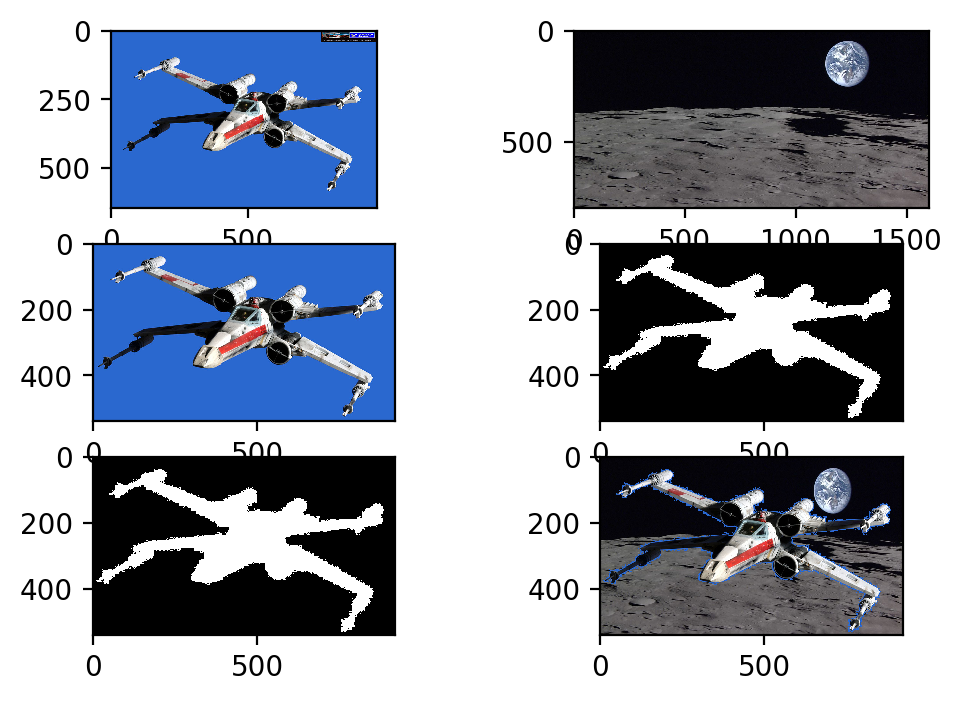

In [157]:
foreground = cv2.imread('images/2011-04-29_KG_RLB_RED_LEADER-003C_small.jpg')
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
background = cv2.imread('images/landscape-moon.jpg')
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 1)
plt.imshow(foreground)
plt.subplot(3, 2, 2)
plt.imshow(background)

# crop foreground image
crop_img = foreground[60:600, 30:950]
plt.subplot(3,2,3)
plt.imshow(crop_img)

# select background
lower = np.array([40, 100, 200])
upper = np.array([50, 110, 210])
bg_mask = cv2.inRange(crop_img, lower, upper)
bg_mask = cv2.bitwise_not(bg_mask, bg_mask)
plt.subplot(3,2,4)
plt.imshow(bg_mask, cmap='gray')

# scale background (ignoring shape)
width, height, _ = crop_img.shape
background = cv2.resize(background, (height, width)) 

# mask must have the same array dimensions as foreground/background
bg_mask = cv2.cvtColor(bg_mask, cv2.COLOR_GRAY2RGB)

# convert to float
foreground = crop_img.astype(float)
background = background.astype(float)
 
# normalize alpha mask (0..1)
alpha = bg_mask.astype(float)/255
plt.subplot(3,2,5)
plt.imshow(alpha)
 
# apply mask
foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)
 
# stack up
outImage = cv2.add(foreground, background)

plt.subplot(3,2,6)
plt.imshow(outImage/255)